## Linear Regression example - Advertising data

The $Advertising$ data has $sales$ (in 1000s of units) as a function of advertising budgets (in 1000s of \$) for different media: $TV$, $radio$ and $newspaper$. We will build a regression model to predict $sales$ based on the other variables.

In [1]:
import pandas
import numpy
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

In [2]:
data = pandas.read_csv('data/islr_data/advertising.csv')
data.drop('Unnamed: 0', 1, inplace=True)
data.sample(5)

,TV,Radio,Newspaper,Sales
176,248.4,30.2,20.3,20.2
123,123.1,34.6,12.4,15.2
60,53.5,2.0,21.4,8.1
121,18.8,21.7,50.4,7.0
148,38.0,40.3,11.9,10.9


In [3]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
regr = smf.ols('Sales ~ TV + Radio + Newspaper', data=data).fit()
print(regr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 18 Oct 2016   Prob (F-statistic):           1.58e-96
Time:                        23:36:10   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

### What can we say about the problem after fitting the model?

The coefficient values say how much the response increases for a unit change in the predictor. For example, increasing $Radio$ budget by \$1000 will increase sales by approximately 188 units. Also, $newspaper$ does not seem to add to sales. We can therefore build a model with just $TV$ and $Radio$ as the inclusion of newspaper will only affect independent results.

In [5]:
regr = smf.ols('Sales ~ TV + Radio', data=data).fit()
print(regr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Tue, 18 Oct 2016   Prob (F-statistic):           4.83e-98
Time:                        23:36:10   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.0

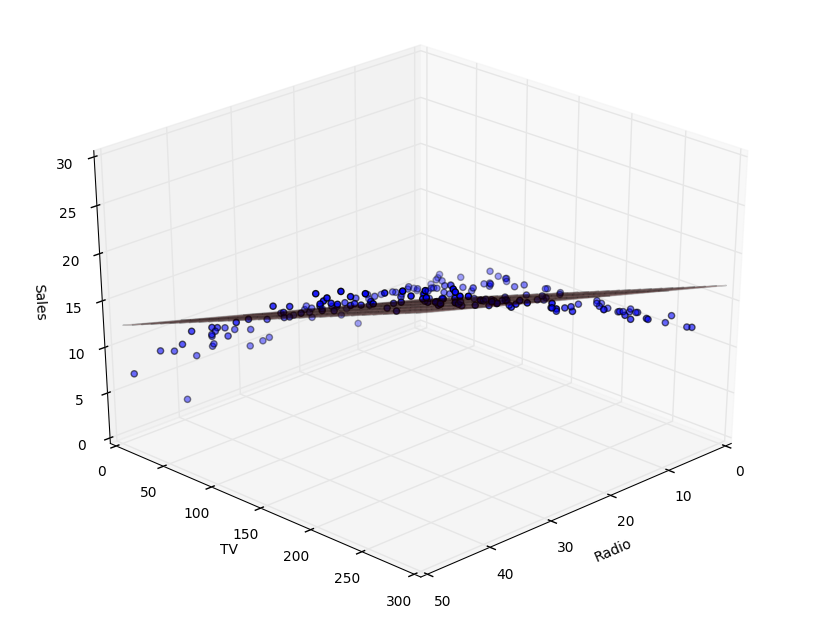

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = axes3d.Axes3D(fig)
ax.view_init(elev=30, azim=45)
ax.scatter3D(data['Radio'], data['TV'], data['Sales'])
ax.set_xlabel('Radio')
ax.set_xlim(0, 50)
ax.set_ylabel('TV')
ax.set_ylim(0, 300)
ax.set_zlabel('Sales')
ax.set_zlim(0, 30)

radio_mesh, TV_mesh = numpy.meshgrid(numpy.arange(0, 50), numpy.arange(0, 300))
sales_mesh = numpy.zeros((300, 50))
for (x, y), v in numpy.ndenumerate(sales_mesh):
    sales_mesh[x, y] = regr.params[0] + regr.params[2]*radio_mesh[x,y] + regr.params[1]*TV_mesh[x,y]
    
ax.plot_surface(radio_mesh, TV_mesh, sales_mesh, alpha=0.20, color='red')

We can see that removing $newspaper$ has led to an increased F-statistic. The above plot shows the regression plane along with the actual points. We can see that there are still points to the above and below of the plane, suggesting that there might be other effects at play here - maybe nonlinear interaction terms. We can now predict $sales$ using our model. Spending \$100000 on $TV$ and \$20000 on $Radio$:

In [7]:
regr.params

Intercept    2.921100
TV           0.045755
Radio        0.187994
dtype: float64

We can also add interaction terms to the model. For example, $TV * Radio$.

In [8]:
regr = smf.ols('Sales ~ TV + Radio + TV*Radio', data=data).fit()
print(regr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Tue, 18 Oct 2016   Prob (F-statistic):          6.68e-146
Time:                        23:36:19   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.0

Adding the interaction term increases R-squared largely suggesting that a lot of the variance is explained by the interaction term $TV * Radio$.